In [8]:
# Load Imports
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from metrics import dice_coef

In [9]:
# Aux. Functions
def loadVolume(patient_name, slice_type):
    ''' Load volume created by predicting partient side'''
    volumes_fp = '../3D_test/Prob_Vols/'
    vol_side_fn = (volumes_fp +
                   patient_name +
                   '_mask_pred_' +
                   slice_type +
                   '.nii')
    return (nib.load(vol_side_fn)).get_data()

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-min_val)/(max_val-min_val + 1e-7)
    return norm_x

def thresholdMask(mask, threshold=0.56):
    mask[mask >= threshold] = 1.0
    mask[mask < threshold] = 0.0
    return mask
    


In [22]:
# Load Patient Input Volume
patient_input = '../test_set_mri_new/test_set_mri/IXI101-Guys-0749-T1.nii'
defaced_patient_input = '../test_set_mri_new/test_set_mri/IXI101-Guys-0749-T1_defaced.nii'
normal = nib.load(patient_input).get_data()
defaced = nib.load(defaced_patient_input).get_data()


In [10]:
# Load probabilistic volumes
patient_name = 'IXI101-Guys-0749-T1'
# Load side volume
slice_type = 'side'
vol_side = loadVolume(patient_name, slice_type)
# Load top volume
slice_type = 'top'
vol_top = loadVolume(patient_name, slice_type)
# Load back volume
slice_type = 'back'
vol_back = loadVolume(patient_name, slice_type)


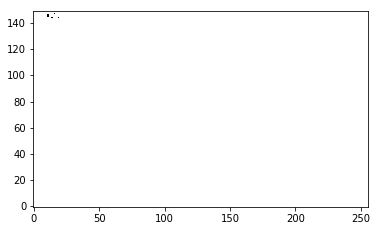

In [55]:
''' Compute the average of each element in matrix across multiple matrices '''
prob_vol_arr = np.array([vol_side, vol_top, vol_back])
avg_vol = np.mean(prob_vol_arr, axis=0)
thresh_vol = thresholdMask(avg_vol, threshold=0.59)
show_slice(thresh_vol[:, 180, :])

In [59]:
# Load slice_type mask & compute dice coefficient
slice_num = 0
slice_fn = ('../slice_data_back_test/' + 
            patient_name + 
            '_back_mask_' + 
            str(slice_num) +
           '.nii')
gt_mask_slice = (nib.load(slice_fn).get_data())
pred_mask_slice = avg_vol[:, slice_num, :]
print('Dice Coefficient : ', dice_coef(gt_mask_slice,
                                       pred_mask_slice,
                                       threshold = 0.59))




Dice Coefficient :  0.8760244180185562
